# Seasonal Flu Vaccination Prediction Analysis

In [1]:
# Pulling right packages

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, plot_roc_curve, \
                            accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Import the data files

df_features = pd.read_csv("data/training_set_features.csv")
df_labels = pd.read_csv("data/training_set_labels.csv")

In [3]:
# Check the shape of the two data files

print(df_features.shape)
print(df_labels.shape)

# There are same number of rows. So we can combines these two dataframes

(26707, 36)
(26707, 3)


In [4]:
# Checking the dataframe info

df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [5]:
# Checking the dataframe info

df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [6]:
# We can join the two df as they have the same column 'respondent_id'

df_merged = df_features.merge(df_labels, how='inner', on='respondent_id')

In [7]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [8]:
# Checking out the merged data columns
pd.set_option('display.max_columns', 1000)
df_merged.head(10)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,5.0,2.0,1.0,5.0,4.0,4.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov,0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,55 - 64 Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo,0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp,1,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,45 - 54 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp,0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,55 - 64 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,0


In [9]:
# Checking for multicolinearity (greater than .8)
df_merged.drop('respondent_id', axis=1).corr()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
h1n1_concern,1.000000,0.062522,0.090301,0.233713,0.156032,0.293565,0.255031,0.246424,0.248016,0.150206,0.135567,0.095162,0.049574,0.033562,-0.003655,0.239604,0.377033,0.360070,0.235136,0.333990,0.225731,-0.015658,0.050525,0.121929,0.154828
h1n1_knowledge,0.062522,1.000000,-0.010836,0.088839,0.030050,0.089785,-0.048898,-0.068219,0.086162,0.093829,0.071920,-0.022602,0.021598,0.170252,0.119408,0.121009,0.073086,-0.019501,0.086103,0.076825,-0.062483,0.024874,0.050583,0.117951,0.120152
behavioral_antiviral_meds,0.090301,-0.010836,1.000000,0.049247,0.146261,0.064119,0.106287,0.127679,0.070868,0.051235,0.030909,0.008465,0.028788,0.009465,-0.063988,0.030211,0.105163,0.079091,0.015003,0.085315,0.084305,0.044900,0.084822,0.040608,0.006277
behavioral_avoidance,0.233713,0.088839,0.049247,1.000000,0.064946,0.338130,0.227675,0.220348,0.335335,0.068145,0.074088,0.039435,-0.000414,0.001180,0.032662,0.112300,0.117851,0.131405,0.119554,0.129504,0.082942,0.019122,0.040328,0.047690,0.076395
behavioral_face_mask,0.156032,0.030050,0.146261,0.064946,1.000000,0.083363,0.180907,0.163382,0.104335,0.084282,0.069481,0.068113,0.039726,0.069992,-0.040257,0.037651,0.131165,0.107129,0.041556,0.110161,0.090009,0.013991,0.005826,0.070498,0.050083
behavioral_wash_hands,0.293565,0.089785,0.064119,0.338130,0.083363,1.000000,0.195364,0.192619,0.365064,0.088729,0.102044,0.030260,0.036188,0.053761,0.031919,0.136987,0.168711,0.150024,0.138517,0.172464,0.088029,0.009669,0.047764,0.074712,0.112414
behavioral_large_gatherings,0.255031,-0.048898,0.106287,0.227675,0.180907,0.195364,1.000000,0.584085,0.253683,0.082242,0.093557,0.104721,0.021168,-0.032319,-0.059000,0.052299,0.126463,0.185924,0.078491,0.132865,0.135446,-0.031938,-0.009449,0.017822,0.064025
behavioral_outside_home,0.246424,-0.068219,0.127679,0.220348,0.163382,0.192619,0.584085,1.000000,0.267719,0.070346,0.085622,0.098858,0.018195,-0.034619,-0.061381,0.050748,0.125549,0.174834,0.067469,0.120237,0.138133,-0.027527,-0.009558,0.021768,0.053509
behavioral_touch_face,0.248016,0.086162,0.070868,0.335335,0.104335,0.365064,0.253683,0.267719,1.000000,0.088221,0.100808,0.028876,0.026640,0.067648,0.011024,0.104126,0.146080,0.131772,0.105798,0.143735,0.090097,-0.000553,0.023606,0.071648,0.120228
doctor_recc_h1n1,0.150206,0.093829,0.051235,0.068145,0.084282,0.088729,0.082242,0.070346,0.088221,1.000000,0.591868,0.158275,0.079389,0.101639,0.067157,0.152305,0.262826,0.113111,0.107512,0.202320,0.057128,0.004112,0.029040,0.393890,0.198607


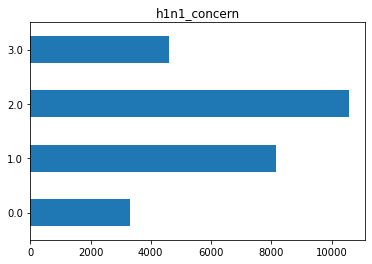

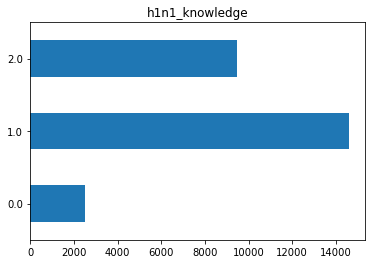

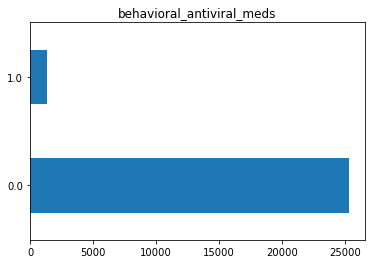

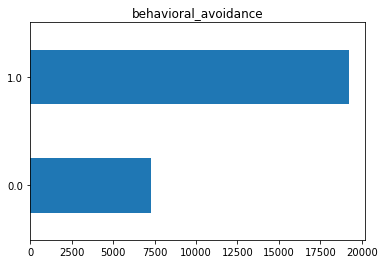

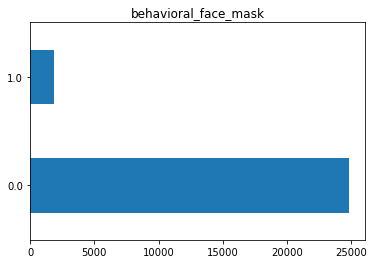

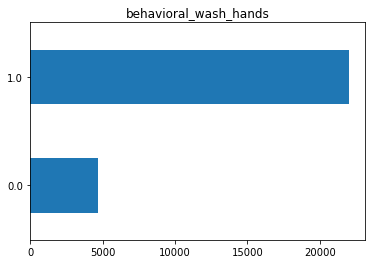

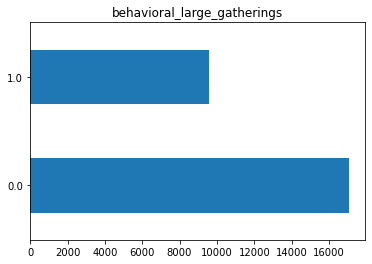

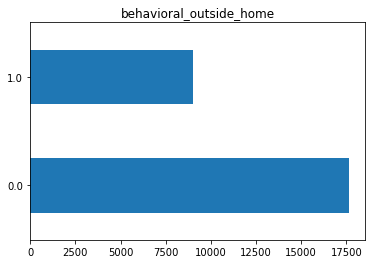

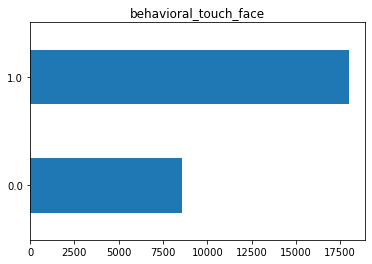

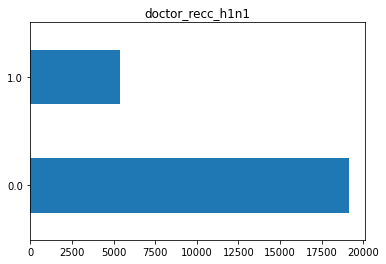

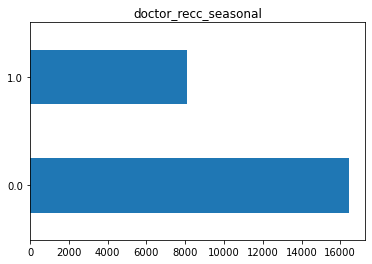

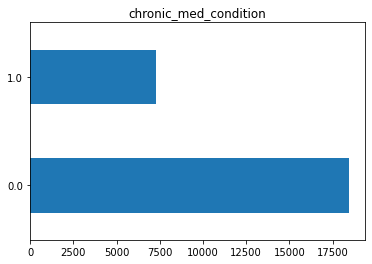

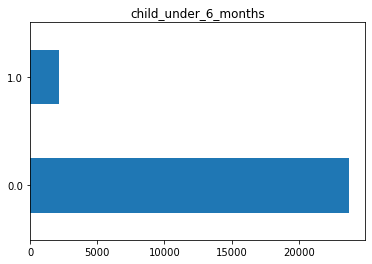

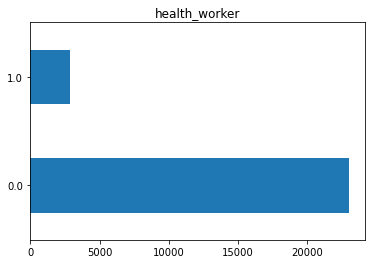

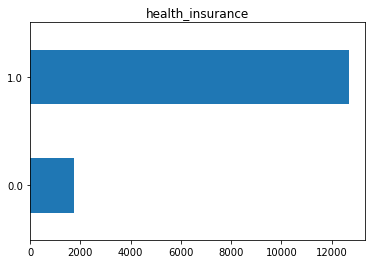

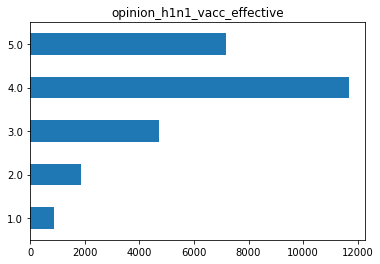

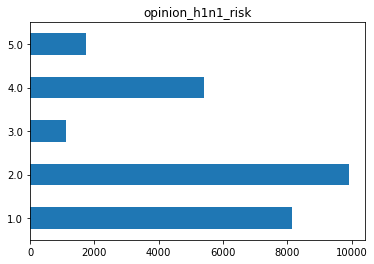

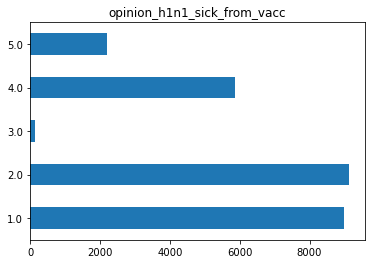

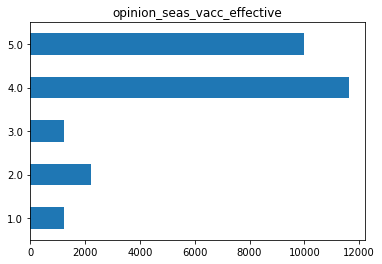

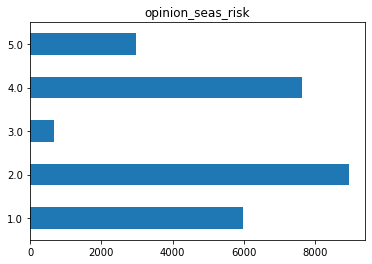

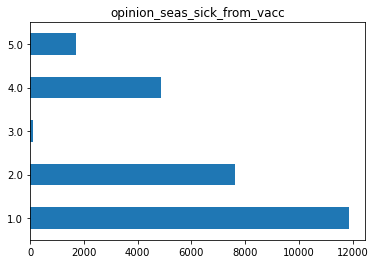

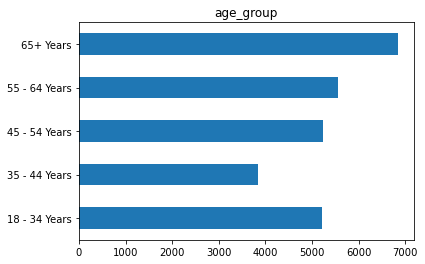

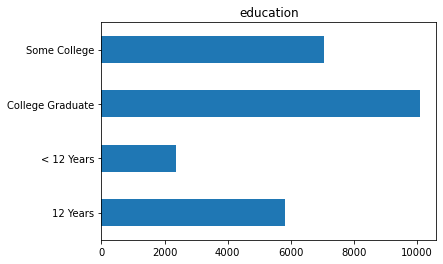

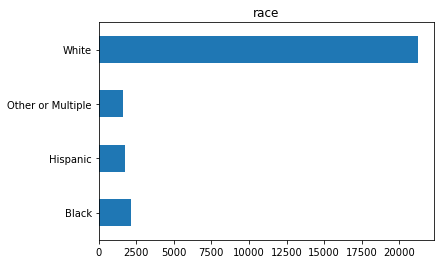

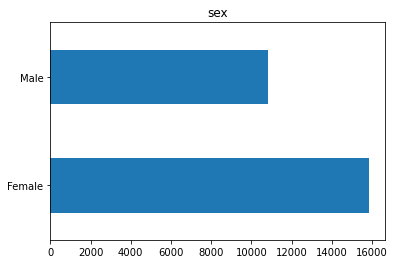

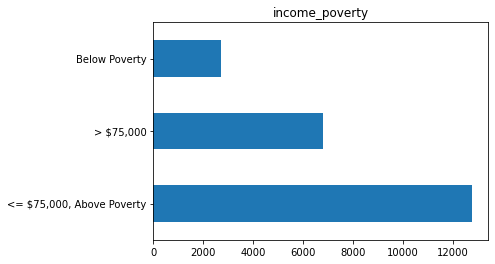

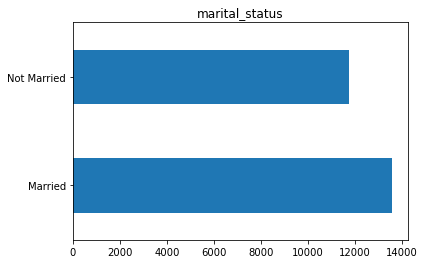

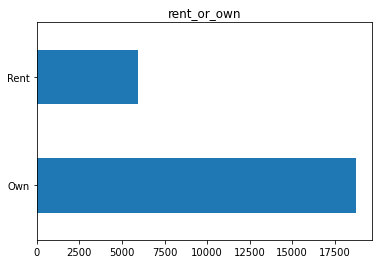

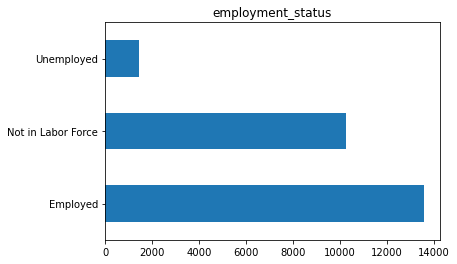

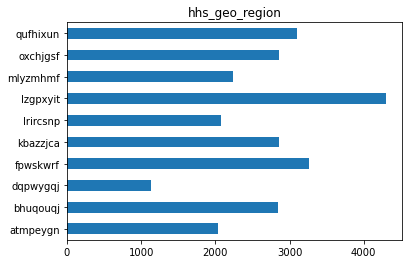

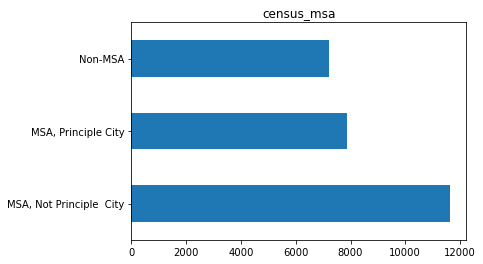

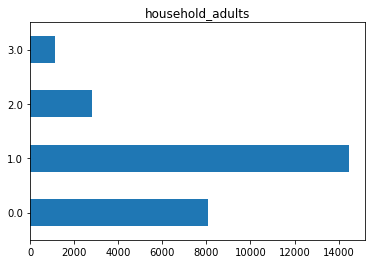

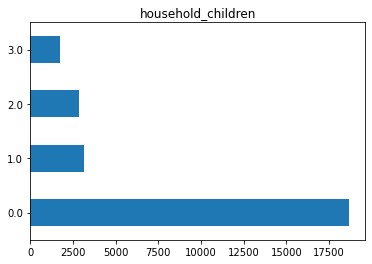

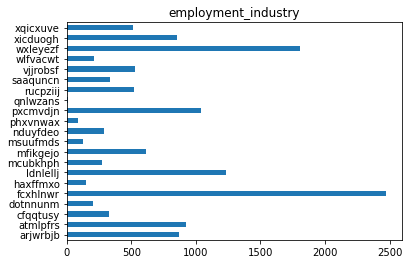

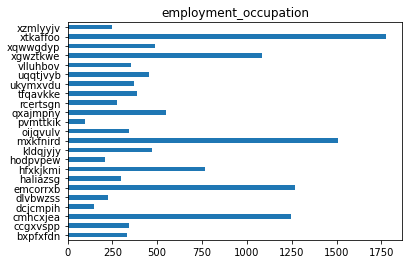

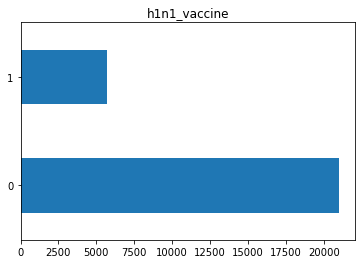

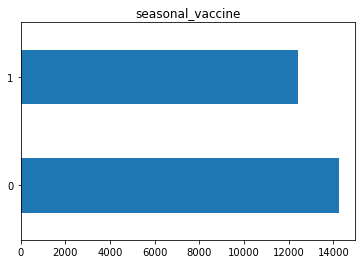

In [10]:
# Write out observations

columns = df_merged.drop('respondent_id', axis=1)

for x in columns:
    df_merged[x].value_counts().sort_index().plot(kind='barh')
    plt.title(x)
    plt.show()

In [11]:
# Write out observations

columns = df_merged.drop('respondent_id', axis=1)

for x in columns:
    print(df_merged[x].value_counts().sort_index())
    print()

0.0     3296
1.0     8153
2.0    10575
3.0     4591
Name: h1n1_concern, dtype: int64

0.0     2506
1.0    14598
2.0     9487
Name: h1n1_knowledge, dtype: int64

0.0    25335
1.0     1301
Name: behavioral_antiviral_meds, dtype: int64

0.0     7271
1.0    19228
Name: behavioral_avoidance, dtype: int64

0.0    24847
1.0     1841
Name: behavioral_face_mask, dtype: int64

0.0     4650
1.0    22015
Name: behavioral_wash_hands, dtype: int64

0.0    17073
1.0     9547
Name: behavioral_large_gatherings, dtype: int64

0.0    17644
1.0     8981
Name: behavioral_outside_home, dtype: int64

0.0     8578
1.0    18001
Name: behavioral_touch_face, dtype: int64

0.0    19139
1.0     5408
Name: doctor_recc_h1n1, dtype: int64

0.0    16453
1.0     8094
Name: doctor_recc_seasonal, dtype: int64

0.0    18446
1.0     7290
Name: chronic_med_condition, dtype: int64

0.0    23749
1.0     2138
Name: child_under_6_months, dtype: int64

0.0    23004
1.0     2899
Name: health_worker, dtype: int64

0.0     1736
1.0

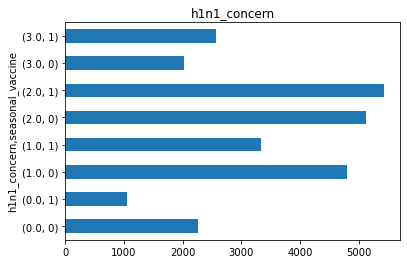

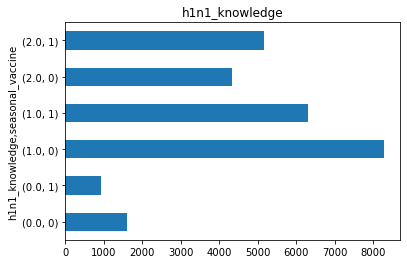

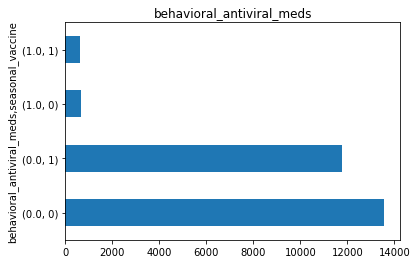

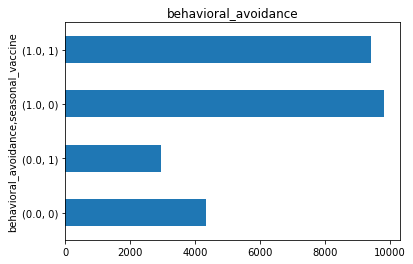

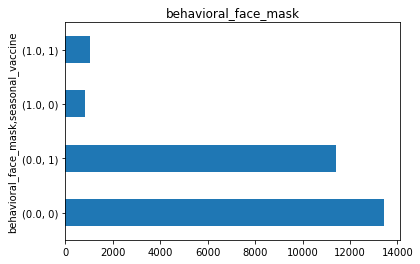

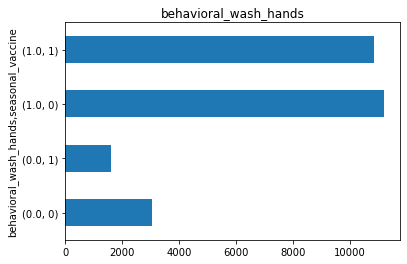

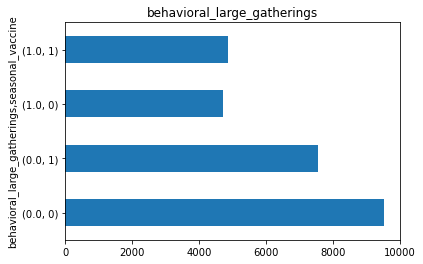

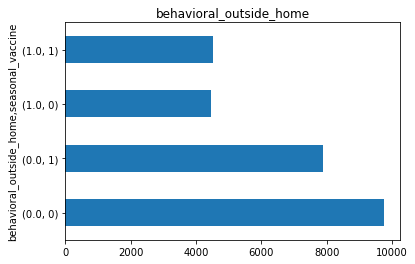

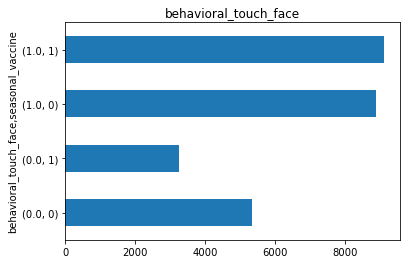

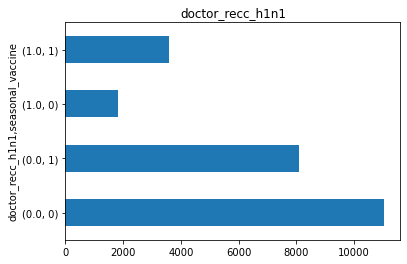

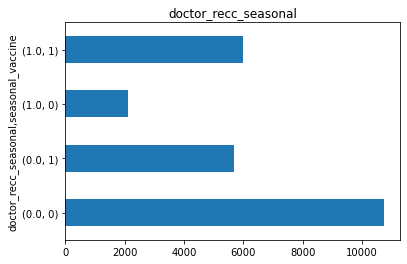

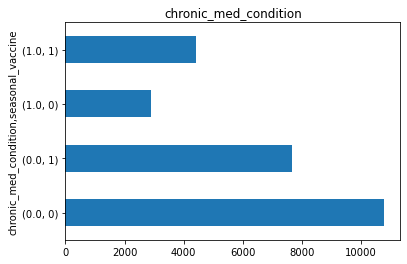

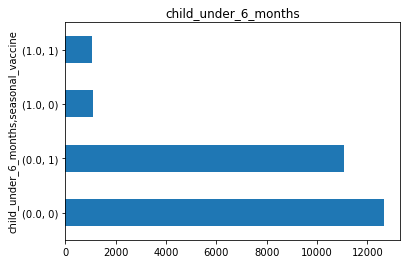

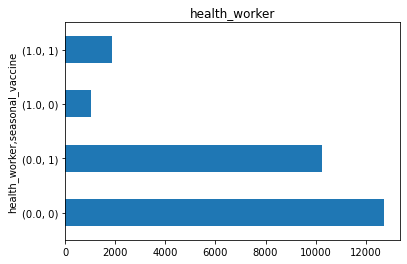

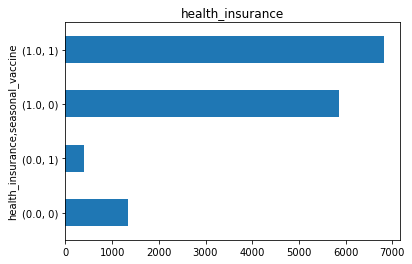

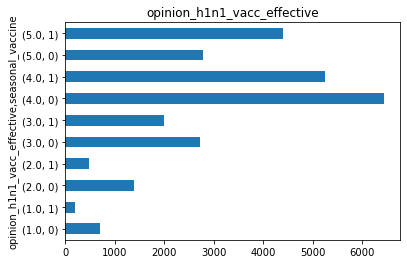

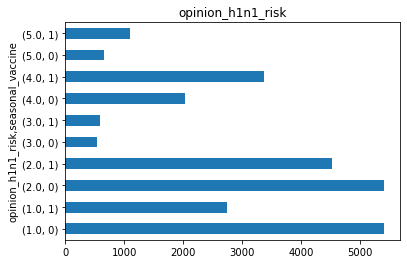

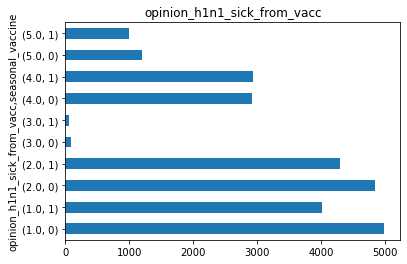

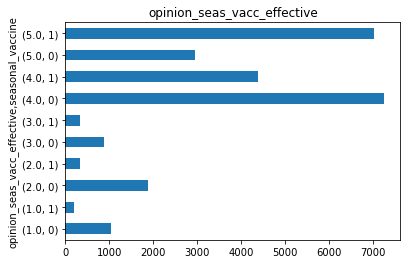

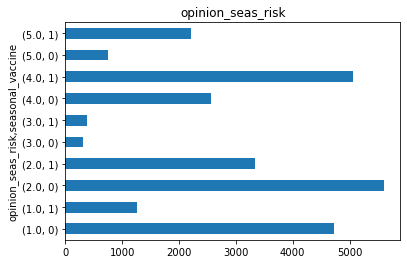

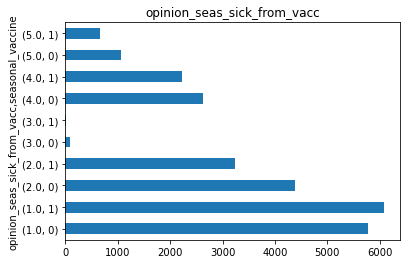

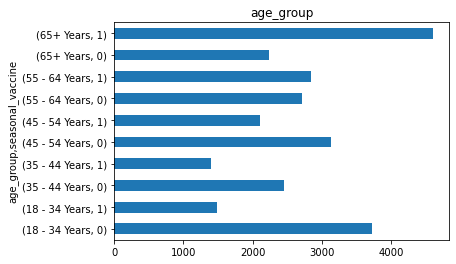

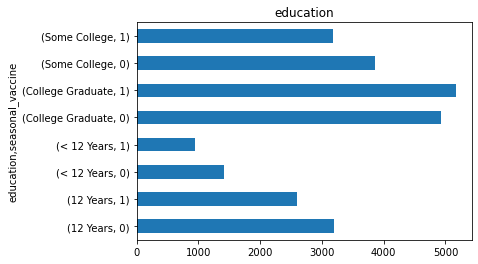

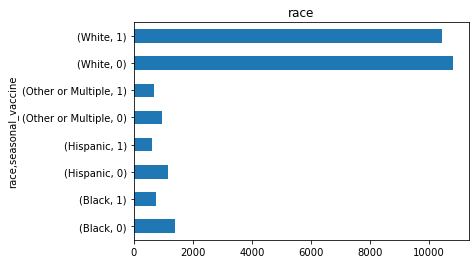

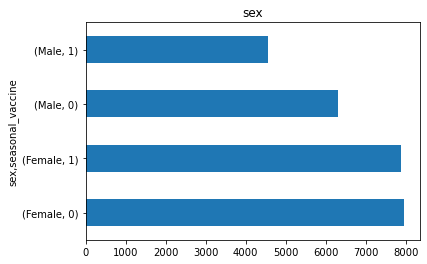

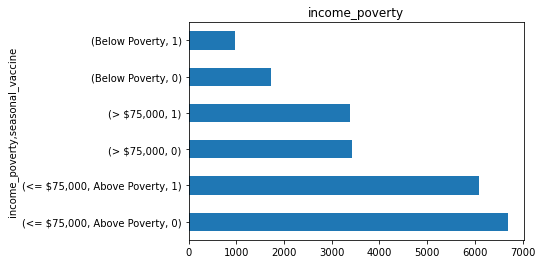

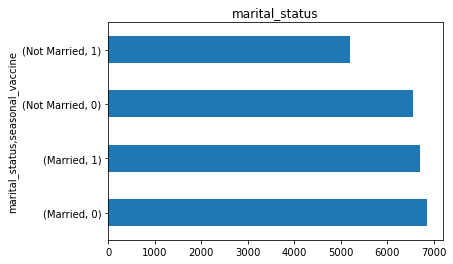

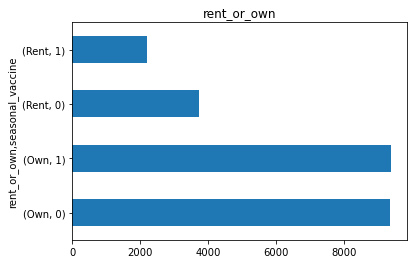

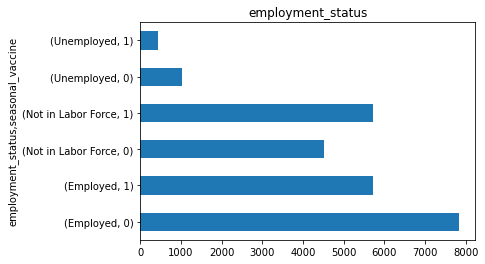

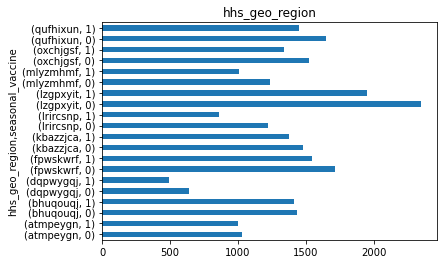

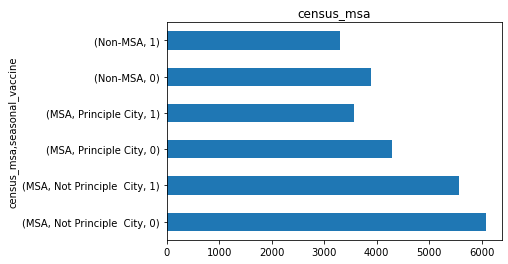

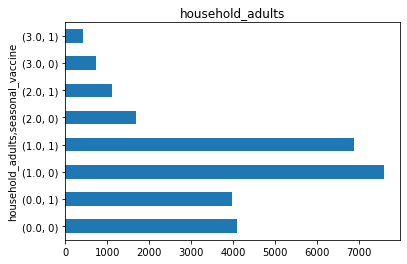

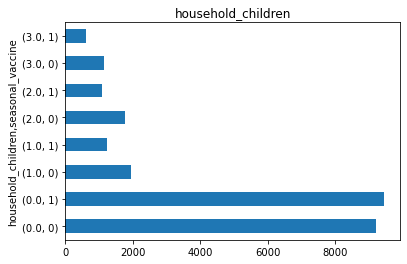

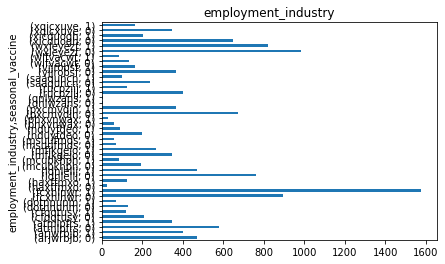

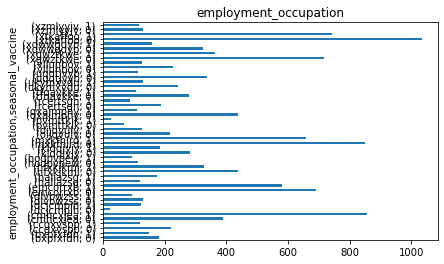

In [12]:
# Write out observations

columns = df_merged.drop(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], axis=1)

for x in columns:
    df_merged[['seasonal_vaccine', x]].groupby([x, 'seasonal_vaccine']).size().plot(kind='barh')
    plt.title(x)
    plt.show()

In [13]:
## Write a rationale on why we are dropping these columns and dropping all NAN values

df_merged.drop(columns = ['hhs_geo_region', 'employment_industry', 'employment_occupation'], 
               axis = 1, inplace = True)

In [14]:
df_master = df_merged.dropna()

In [15]:
df_master.shape

(11794, 35)

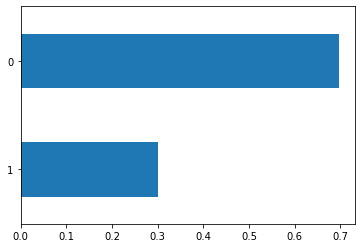

In [16]:
df_master['h1n1_vaccine'].value_counts(normalize=True).sort_index(ascending=False).plot(kind = "barh");

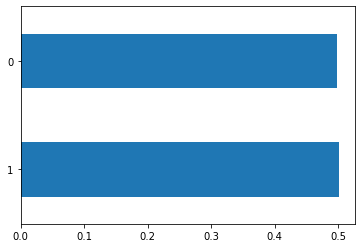

In [17]:
# We have balanced target dataset

df_master['seasonal_vaccine'].value_counts(normalize=True).sort_index(ascending=False).plot(kind = "barh");

## Baseline Model for Seasonal Flu Vaccination

In [18]:
# Setting up for the baseline model

X_base = df_master[['doctor_recc_seasonal', 'health_insurance', 'opinion_seas_vacc_effective']]
y_base = df_master['seasonal_vaccine']

In [19]:
# Train Test Split
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, 
                                                                        y_base, 
                                                                        test_size = .2, 
                                                                        random_state=12)

In [20]:
scaler = StandardScaler()
X_train_base_sc = scaler.fit_transform(X_train_base)
X_test_base_sc = scaler.transform(X_test_base)

In [21]:
logreg = LogisticRegression(random_state = 7)
logreg.fit(X_train_base_sc, y_train_base)

LogisticRegression(random_state=7)

In [22]:
y_train_base_pred = logreg.predict(X_train_base_sc)
y_test_base_pred = logreg.predict(X_test_base_sc)

In [23]:
base_train_acc_score = accuracy_score(y_train_base, y_train_base_pred)
base_test_acc_score = accuracy_score(y_test_base, y_test_base_pred)
base_train_pre_score = precision_score(y_train_base, y_train_base_pred)
base_test_pre_score = precision_score(y_test_base, y_test_base_pred)
base_train_recall_score = recall_score(y_train_base, y_train_base_pred)
base_test_recall_score = recall_score(y_test_base, y_test_base_pred)

print("Accuracy Score for Train Data:   ", base_train_acc_score)
print("Accuracy Score for Test Data:    ", base_test_acc_score)
print("Precision Score for Train Data:  ", base_train_pre_score)
print("Precision Score for Test Data:   ", base_test_pre_score)
print("Recall Score for Train Data:     ", base_train_recall_score)
print("Recall Score for Test Data:      ", base_test_recall_score)

Accuracy Score for Train Data:    0.7516693163751987
Accuracy Score for Test Data:     0.7490462060194998
Precision Score for Train Data:   0.7561501942166595
Precision Score for Test Data:    0.7579831932773109
Recall Score for Train Data:      0.7428450286198856
Recall Score for Test Data:       0.7479270315091211


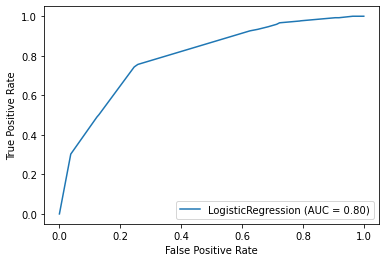

In [24]:
plot_roc_curve(logreg, X_test_base_sc, y_test_base);

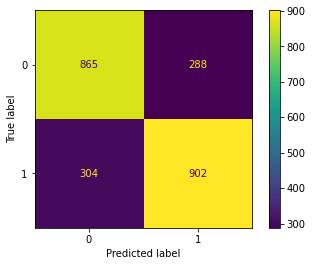

In [25]:
plot_confusion_matrix(logreg,
                      X_test_base_sc,
                      y_test_base);

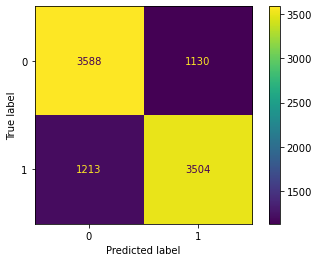

In [26]:
# remove
plot_confusion_matrix(logreg,
                      X_train_base_sc,
                      y_train_base);

## Model Improvement #1  (Anthony)  - all columns and all columns without H1N1

In [27]:
# Make sure there's no data leakage, if doing OHE - do it correctly, do cross-validation (train test split twice), 

## Model Improvement #2  (Sangwon)  - playing with LogReg funciton feature

In [28]:
# Choose what non-numeric columns to do either OHE or OrdinalEncoder
columns = ['age_group', 'education', 'race', 'sex', 'income_poverty', 
           'marital_status', 'rent_or_own', 'employment_status', 'census_msa']

for x in columns:
    print(df_master[x].value_counts().sort_index())
    print()

18 - 34 Years    2370
35 - 44 Years    1704
45 - 54 Years    2400
55 - 64 Years    2563
65+ Years        2757
Name: age_group, dtype: int64

12 Years            2644
< 12 Years           985
College Graduate    4802
Some College        3363
Name: education, dtype: int64

Black                 910
Hispanic              742
Other or Multiple     685
White                9457
Name: race, dtype: int64

Female    6997
Male      4797
Name: sex, dtype: int64

<= $75,000, Above Poverty    6750
> $75,000                    3629
Below Poverty                1415
Name: income_poverty, dtype: int64

Married        6340
Not Married    5454
Name: marital_status, dtype: int64

Own     8930
Rent    2864
Name: rent_or_own, dtype: int64

Employed              6602
Not in Labor Force    4500
Unemployed             692
Name: employment_status, dtype: int64

MSA, Not Principle  City    5116
MSA, Principle City         3451
Non-MSA                     3227
Name: census_msa, dtype: int64



In [29]:
# Setting up for the baseline model

X_m2 = df_master.drop('seasonal_vaccine', axis=1)
y_m2 = df_master['seasonal_vaccine']

In [30]:
# Train Test Split
X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(X_m2, 
                                                                y_m2, 
                                                                test_size = .2, 
                                                                random_state=22)

In [31]:
# OHE for Train Set
ohe_columns = ['age_group', 'education', 'race', 'sex', 'income_poverty', 
           'marital_status', 'rent_or_own', 'employment_status', 'census_msa']

ohe = OneHotEncoder(drop = 'first')
ohe.fit(X_train_m2[ohe_columns])

X_train_m2_ohe = pd.DataFrame(ohe.transform(X_train_m2[ohe_columns]).todense(), 
                              columns = ohe.get_feature_names(), index=X_train_m2.index)

In [32]:
X_train_m2_numeric = X_train_m2.drop(columns = ['age_group', 'education', 'race', 'sex', 'income_poverty', 
           'marital_status', 'rent_or_own', 'employment_status', 'census_msa', 'respondent_id'], axis = 1)

In [33]:
X_train_m2_concat = pd.concat([X_train_m2_numeric, X_train_m2_ohe], axis=1)

In [34]:
# OHE for Test Set
X_test_m2_ohe = pd.DataFrame(ohe.transform(X_test_m2[ohe_columns]).todense(), 
                              columns = ohe.get_feature_names(), index=X_test_m2.index)

In [35]:
X_test_m2_numeric = X_test_m2.drop(columns = ['age_group', 'education', 'race', 'sex', 'income_poverty', 
           'marital_status', 'rent_or_own', 'employment_status', 'census_msa', 'respondent_id'], axis = 1)

In [36]:
X_test_m2_concat = pd.concat([X_test_m2_numeric, X_test_m2_ohe], axis=1)

In [37]:
# Standard Scaler
scaler = StandardScaler()
X_train_m2_concat_sc = scaler.fit_transform(X_train_m2_concat)
X_test_m2_concat_sc = scaler.transform(X_test_m2_concat)

In [38]:
# Log Regression
logreg = LogisticRegression(penalty = 'l1', solver = 'saga',random_state = 5)
logreg.fit(X_train_m2_concat_sc, y_train_m2)

LogisticRegression(penalty='l1', random_state=5, solver='saga')

In [39]:
# Predict based on Log Regression model
y_train_m2_pred = logreg.predict(X_train_m2_concat_sc)
y_test_m2_pred = logreg.predict(X_test_m2_concat_sc)

In [40]:
# Evaluation Metric #1 - Accuracy, Precision, Recall scores
m2_train_acc_score = accuracy_score(y_train_m2, y_train_m2_pred)
m2_test_acc_score = accuracy_score(y_test_m2, y_test_m2_pred)
m2_train_pre_score = precision_score(y_train_m2, y_train_m2_pred)
m2_test_pre_score = precision_score(y_test_m2, y_test_m2_pred)
m2_train_recall_score = recall_score(y_train_m2, y_train_m2_pred)
m2_test_recall_score = recall_score(y_test_m2, y_test_m2_pred)

print("Accuracy Score for Train Data:   ", m2_train_acc_score)
print("Accuracy Score for Test Data:    ", m2_test_acc_score)
print("Precision Score for Train Data:  ", m2_train_pre_score)
print("Precision Score for Test Data:   ", m2_test_pre_score)
print("Recall Score for Train Data:     ", m2_train_recall_score)
print("Recall Score for Test Data:      ", m2_test_recall_score)

Accuracy Score for Train Data:    0.8224695283518813
Accuracy Score for Test Data:     0.8300127172530734
Precision Score for Train Data:   0.8352966841186736
Precision Score for Test Data:    0.8346320346320346
Recall Score for Train Data:      0.8062750052642662
Recall Score for Test Data:       0.8211243611584327


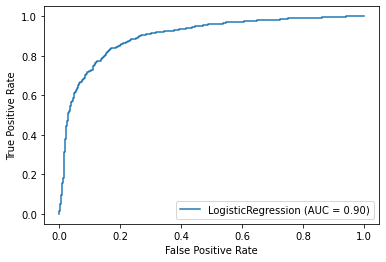

In [41]:
# Evaluation Metric #2 - ROC curve
plot_roc_curve(logreg, X_test_m2_concat_sc, y_test_m2);

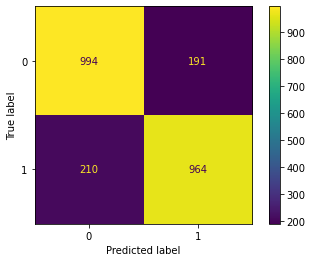

In [42]:
# Evaluation Metric #3 - Confusion Matrix

## Change the x and y label to yes and no instead of 1 and 0
plot_confusion_matrix(logreg,
                      X_test_m2_concat_sc,
                      y_test_m2);

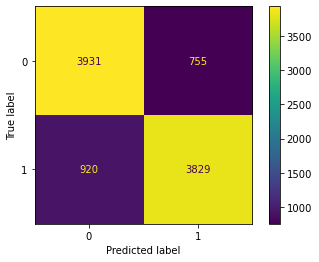

In [43]:
# Evaluation Metric #3 - Confusion Matrix
plot_confusion_matrix(logreg,
                      X_train_m2_concat_sc,
                      y_train_m2);

## Model Improvement #3  (Ermiyas)  - using decision tree classifier to determine the columns to use

In [ ]:
# Create data frame for numerical feature
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df_master.select_dtypes(include=numerics)

In [ ]:
# Set X and y for numerical data frame
X_numeric = newdf.drop(columns = ['respondent_id','h1n1_vaccine','seasonal_vaccine'], axis = 1)
y_numeric = newdf['seasonal_vaccine']

In [ ]:
# Call feature_name used 
feature_used = X_numeric.columns
# Intiate and fit DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_numeric, y_numeric)
# Using dt.feature_importances_ paramter evaluate the feature importance for each columns
for fi, feature in zip(dt.feature_importances_, feature_used):
    print(fi, feature)

In [ ]:
# Create catagorical dataframe which has a dtype of object
catagorical = df_master[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own',
              'employment_status','census_msa']]

In [ ]:
# Transform the catagorical dataframe using OneHotEncoder
ohe = OneHotEncoder(drop='first')
ohe.fit(catagorical)
catagorical_encoded = pd.DataFrame(ohe.transform(catagorical).todense(),
                               columns=ohe.get_feature_names(),index=catagorical.index)
catagorical_encoded

In [ ]:
# Add together the numerical dataframe with the transformed catagorical dataframe 
df_total = pd.concat([newdf,catagorical_encoded],axis = 1)

In [ ]:
# Set X and y for all features
X_all = df_total.drop(columns = ['respondent_id','h1n1_vaccine','seasonal_vaccine'], axis = 1)
y_all= df_total['seasonal_vaccine']

In [ ]:
# Using decision tree to identify feature importance for both numerical and transformed catagorical dataframe
# Call feature_name used 
feature_used = X_all.columns
# Intiate and fit DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_all, y_all)
# Using dt.feature_importances_ paramter evaluate the feature importance for each columns
for fi, feature in zip(dt.feature_importances_, feature_used):
    print(fi, feature)

In [ ]:
# Use 8 feature from the desicion tree results above 
X_feature = df_total[['doctor_recc_seasonal','opinion_seas_risk','opinion_h1n1_sick_from_vacc',
                      'opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_seas_sick_from_vacc',
                      'opinion_seas_vacc_effective']]
y_feature = df_total['seasonal_vaccine']

In [ ]:
# Train Test Split
X_train_feature, X_test_feature, y_train_feature, y_test_feature = train_test_split(X_feature, 
                                                                                    y_feature, 
                                                                                    test_size = .2, 
                                                                                    random_state=22)

In [ ]:
# Apply standard scaler 
scaler_ft = StandardScaler()
scaler_ft.fit(X_train_feature)
X_train_ft_sc = scaler_ft.transform(X_train_feature)
X_test_ft_sc = scaler_ft.transform(X_test_feature)

In [ ]:
# Initiate and fit the logistic regression
logreg_ft = LogisticRegression(random_state = 1)
logreg_ft.fit(X_train_ft_sc, y_train_feature)

In [ ]:
y_pred_log_ft_test = logreg_ft.predict(X_test_ft_sc)
y_pred_log_ft_train = logreg_ft.predict(X_train_ft_sc)

In [ ]:
feature_train_acc_score = accuracy_score(y_train_feature, y_pred_log_ft_train)
feature_test_acc_score = accuracy_score(y_test_feature, y_pred_log_ft_test)
feature_train_pre_score = precision_score(y_train_feature, y_pred_log_ft_train)
feature_test_pre_score = precision_score(y_test_feature, y_pred_log_ft_test)
feature_train_recall_score = recall_score(y_train_feature, y_pred_log_ft_train)
feature_test_recall_score = recall_score(y_test_feature, y_pred_log_ft_test)

print("Accuracy Score for Train Data:   ", feature_train_acc_score)
print("Accuracy Score for Test Data:    ", feature_test_acc_score)
print("Precision Score for Train Data:  ", feature_train_pre_score)
print("Precision Score for Test Data:   ", feature_test_pre_score)
print("Recall Score for Train Data:     ", feature_train_recall_score)
print("Recall Score for Test Data:      ", feature_test_recall_score)

In [ ]:
plot_roc_curve(logreg_ft, X_test_ft_sc, y_test_feature);

In [ ]:
plot_confusion_matrix(logreg_ft, X_test_ft_sc, y_test_feature);

In [ ]:
# Decision Tree model using all features
X_dt = df_total.drop(columns = ['respondent_id','h1n1_vaccine','seasonal_vaccine'], axis = 1)
y_dt = df_total['seasonal_vaccine']

In [ ]:
# Train Test Split
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, 
                                                                y_dt, 
                                                                test_size = .2, 
                                                                random_state=22)

In [ ]:
# Initiate and fit DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 4, random_state=1)
dt.fit(X_train_dt, y_train_dt)

In [ ]:
# Decisiion tree prediction for test and train
y_pred_dt_test = dt.predict(X_test_dt)
y_pred_dt_train = dt.predict(X_train_dt)

In [ ]:
# Evaluating decision tree model metrics using Sklearn
dt_train_acc_score = accuracy_score(y_train_dt, y_pred_dt_train)
dt_test_acc_score = accuracy_score(y_test_dt, y_pred_dt_test)
dt_train_pre_score = precision_score(y_train_dt, y_pred_dt_train)
dt_test_pre_score = precision_score(y_test_dt, y_pred_dt_test)
dt_train_recall_score = recall_score(y_train_dt, y_pred_dt_train)
dt_test_recall_score = recall_score(y_test_dt, y_pred_dt_test)

# Print the metrics
print("Accuracy Score for Train Data:   ", dt_train_acc_score)
print("Accuracy Score for Test Data:    ", feature_test_acc_score)
print("Precision Score for Train Data:  ", feature_train_pre_score)
print("Precision Score for Test Data:   ", feature_test_pre_score)
print("Recall Score for Train Data:     ", feature_train_recall_score)
print("Recall Score for Test Data:      ", feature_test_recall_score)

In [ ]:
plot_roc_curve(dt, X_test_dt, y_test_dt);

In [ ]:
plot_confusion_matrix(dt, X_test_dt, y_test_dt);